# Content
- Low Variance Analysis
- Feature Importance using F-Statistics
    - Selecting a single target column Segmentation_A for the F-statistics test
    - Selecting a single target column Segmentation_B for the F-statistics test
    - Selecting a single target column Segmentation_C for the F-statistics test
    - Selecting a single target column Segmentation_D for the F-statistics test
    - Find common non-significant features for all 4 target classes
- Drop non-significant features ( which are non-significant for all 4 target classes)

# Low Variance Analysis

In [97]:
import pandas as pd
from sklearn.feature_selection import VarianceThreshold

# Load the dataset
df = pd.read_csv('train_split_scaled.csv')

# Extract the target columns and all feature columns
target_columns = ['Segmentation_A', 'Segmentation_B', 'Segmentation_C', 'Segmentation_D']
all_feature_columns = [col for col in df.columns if col not in target_columns]

# Apply VarianceThreshold for low variance analysis (e.g., threshold=0.01)
selector = VarianceThreshold(threshold=0.01)
features_selected = selector.fit_transform(df[all_feature_columns])

# Identify columns with low variance
low_variance_columns = [col for col in all_feature_columns if col not in [all_feature_columns[i] for i in selector.get_support(indices=True)]]

print("Columns with low variance:", low_variance_columns)


Columns with low variance: []


The result "Columns with low variance: []" indicates that there are no columns with variance below the threshold of 0.01. Let's find the minimum threshold that would result in at least one low-variance column being identified

In [68]:
# Initialize variables
min_threshold = 0.0
min_variance_columns = []

# Find the minimum threshold that results in a low-variance column
while True:
    selector = VarianceThreshold(threshold=min_threshold)
    selector.fit(df[all_feature_columns])
    low_variance_columns = [col for col in all_feature_columns if col not in [all_feature_columns[i] for i in selector.get_support(indices=True)]]
    if low_variance_columns:
        min_variance_columns = low_variance_columns
        break
    min_threshold += 0.01

print("Minimum threshold for identifying low-variance columns:", min_threshold)
print("Columns with the lowest variance:", min_variance_columns)


Minimum threshold for identifying low-variance columns: 0.02
Columns with the lowest variance: ['Profession_Unknown', 'Var_1_Cat_5']


# Feature Importance using F-Statistics

### Selecting a single target column Segmentation_A for the F-statistics test

Significant features based on F-statistics: ['Age', 'Work_Experience', 'Spending_Score', 'Family_Size', 'Profession_Doctor', 'Profession_Engineer', 'Profession_Entertainment', 'Profession_Executive', 'Profession_Healthcare', 'Profession_Lawyer', 'Var_1_Cat_2', 'Var_1_Cat_4', 'Var_1_Cat_6']
Non-significant features based on F-statistics: ['Gender_Male', 'Profession_Homemaker', 'Profession_Marketing', 'Profession_Unknown', 'Ever_Married_Yes', 'Graduated_Yes', 'Var_1_Cat_3', 'Var_1_Cat_5', 'Var_1_Cat_7']


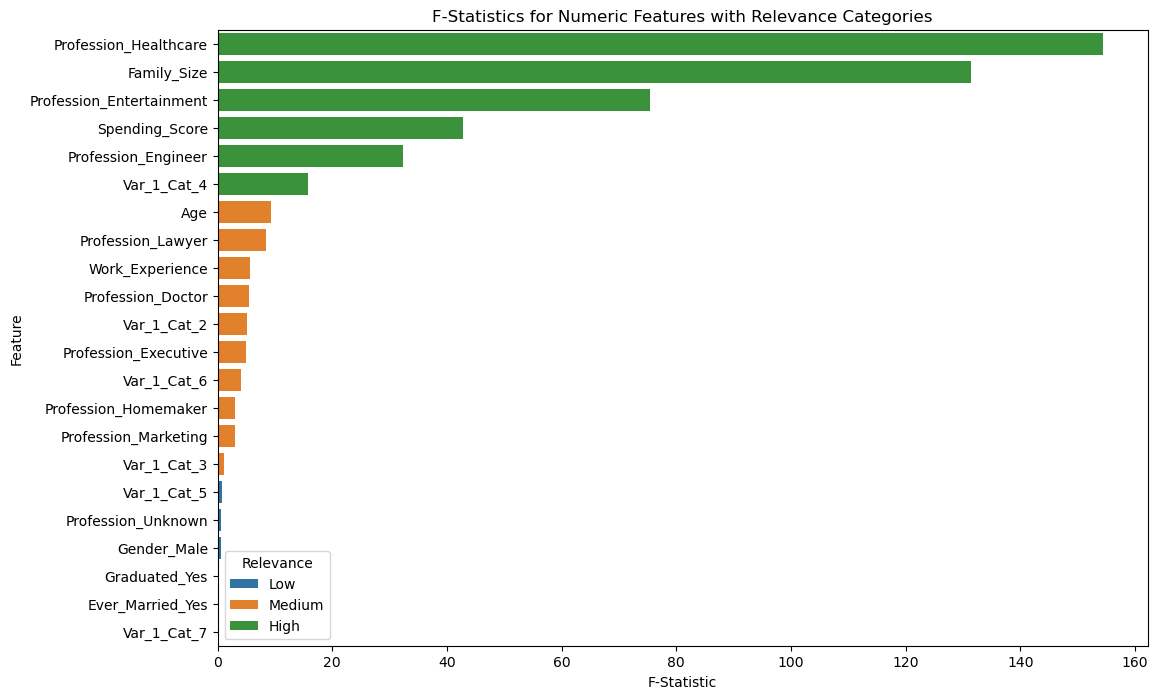

In [71]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.feature_selection import f_classif

# Extract the target column ('Segmentation_A' in this case) and all feature columns
target_column = 'Segmentation_A'
all_feature_columns = [col for col in df.columns if col != target_column and col not in ['Segmentation_B', 'Segmentation_C', 'Segmentation_D']]

# Perform F-statistics test to compute feature importance
f_values, p_values = f_classif(df[all_feature_columns], df[target_column])

# Create a DataFrame to store F-statistics and features
f_stat_df = pd.DataFrame({'Feature': all_feature_columns, 'F-Statistic': f_values, 'p-value': p_values})

# Select significant and non-significant features based on p-values ( p < 0.05)
significant_features = f_stat_df[f_stat_df['p-value'] < 0.05]['Feature']
non_significant_features = f_stat_df[f_stat_df['p-value'] >= 0.05]['Feature']

# Print significant and non-significant features
print("Significant features based on F-statistics:", significant_features.tolist())
print("Non-significant features based on F-statistics:", non_significant_features.tolist())

# Sort the DataFrame by F-Statistic values
f_stat_df = f_stat_df.sort_values(by='F-Statistic', ascending=False)

# Define categorization thresholds
high_threshold = f_stat_df['F-Statistic'].quantile(0.75)
medium_threshold = f_stat_df['F-Statistic'].quantile(0.25)

# Categorize features
f_stat_df['Relevance'] = pd.cut(f_stat_df['F-Statistic'], bins=[-np.inf, medium_threshold, high_threshold, np.inf], labels=['Low', 'Medium', 'High'])

# Plot the F-Statistics with categories
plt.figure(figsize=(12, 8))
sns.barplot(x='F-Statistic', y='Feature', hue='Relevance', data=f_stat_df, dodge=False)
plt.title("F-Statistics for Numeric Features with Relevance Categories")
plt.savefig('f_statistics_with_relevance_categories.png')
plt.show()


### Selecting a single target column Segmentation_B for the F-statistics test

Significant features based on F-statistics: ['Age', 'Work_Experience', 'Spending_Score', 'Family_Size', 'Profession_Engineer', 'Profession_Executive', 'Profession_Healthcare', 'Profession_Marketing', 'Ever_Married_Yes', 'Graduated_Yes', 'Var_1_Cat_4']
Non-significant features based on F-statistics: ['Gender_Male', 'Profession_Doctor', 'Profession_Entertainment', 'Profession_Homemaker', 'Profession_Lawyer', 'Profession_Unknown', 'Var_1_Cat_2', 'Var_1_Cat_3', 'Var_1_Cat_5', 'Var_1_Cat_6', 'Var_1_Cat_7']


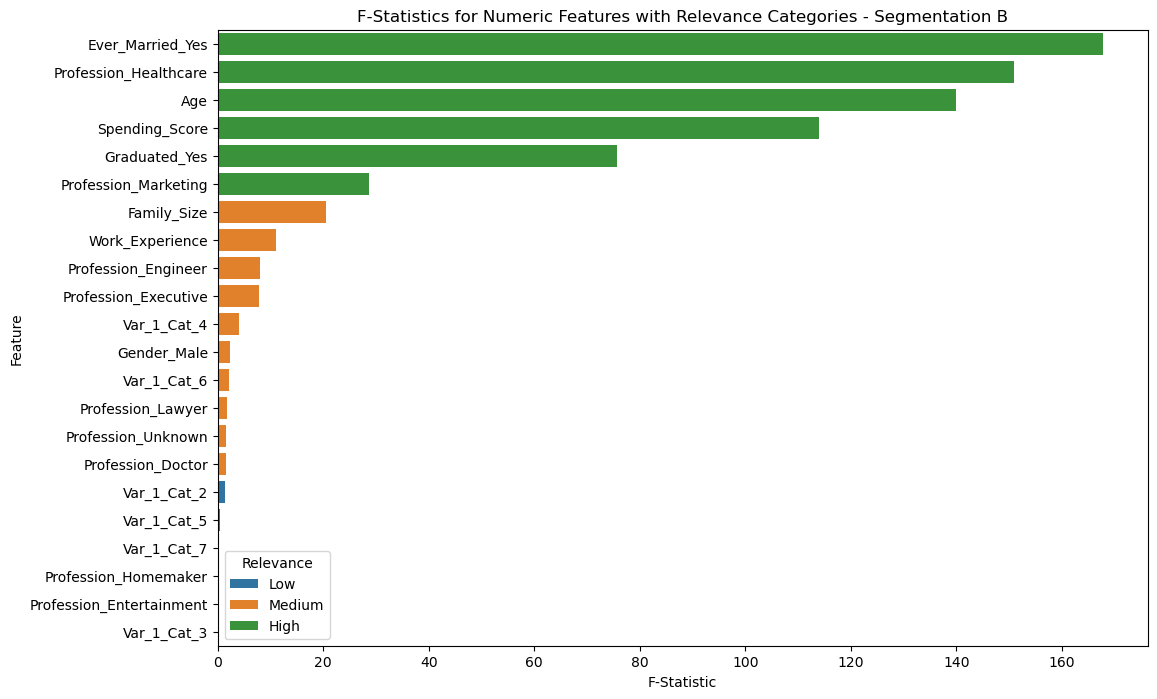

In [73]:
# Extract the target column ('Segmentation_B' in this case) and all feature columns
target_column = 'Segmentation_B'
all_feature_columns = [col for col in df.columns if col != target_column and col not in ['Segmentation_A', 'Segmentation_C', 'Segmentation_D']]

# Perform F-statistics test to compute feature importance
f_values, p_values = f_classif(df[all_feature_columns], df[target_column])

# Create a DataFrame to store F-statistics and features
f_stat_df = pd.DataFrame({'Feature': all_feature_columns, 'F-Statistic': f_values, 'p-value': p_values})

# Select significant and non-significant features based on p-values ( p < 0.05)
significant_features = f_stat_df[f_stat_df['p-value'] < 0.05]['Feature']
non_significant_features = f_stat_df[f_stat_df['p-value'] >= 0.05]['Feature']

# Print significant and non-significant features
print("Significant features based on F-statistics:", significant_features.tolist())
print("Non-significant features based on F-statistics:", non_significant_features.tolist())

# Sort the DataFrame by F-Statistic values
f_stat_df = f_stat_df.sort_values(by='F-Statistic', ascending=False)

# Define categorization thresholds
high_threshold = f_stat_df['F-Statistic'].quantile(0.75)
medium_threshold = f_stat_df['F-Statistic'].quantile(0.25)

# Categorize features
f_stat_df['Relevance'] = pd.cut(f_stat_df['F-Statistic'], bins=[-np.inf, medium_threshold, high_threshold, np.inf], labels=['Low', 'Medium', 'High'])

# Plot the F-Statistics with categories
plt.figure(figsize=(12, 8))
sns.barplot(x='F-Statistic', y='Feature', hue='Relevance', data=f_stat_df, dodge=False)
plt.title("F-Statistics for Numeric Features with Relevance Categories - Segmentation B")
plt.savefig('f_statistics_with_relevance_categories_segmentation_b.png')
plt.show()


### Selecting a single target column Segmentation_C for the F-statistics test

Significant features based on F-statistics: ['Age', 'Work_Experience', 'Spending_Score', 'Family_Size', 'Profession_Doctor', 'Profession_Engineer', 'Profession_Entertainment', 'Profession_Executive', 'Profession_Healthcare', 'Profession_Homemaker', 'Profession_Marketing', 'Profession_Unknown', 'Ever_Married_Yes', 'Graduated_Yes', 'Var_1_Cat_3', 'Var_1_Cat_4', 'Var_1_Cat_6']
Non-significant features based on F-statistics: ['Gender_Male', 'Profession_Lawyer', 'Var_1_Cat_2', 'Var_1_Cat_5', 'Var_1_Cat_7']


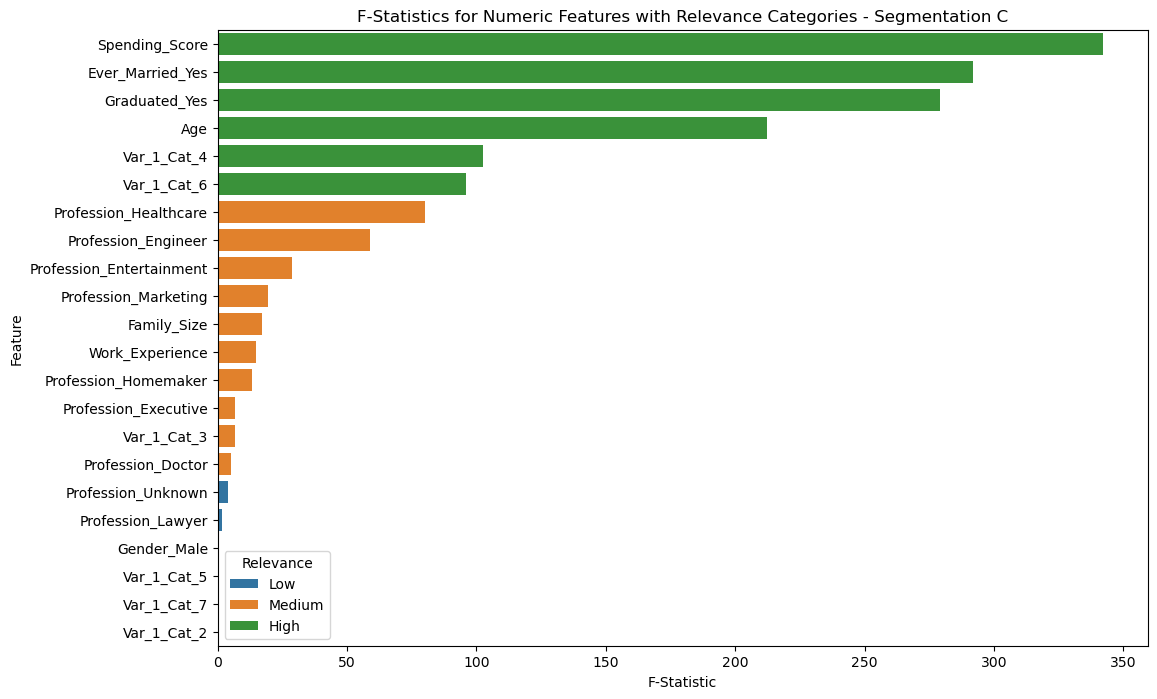

In [75]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.feature_selection import f_classif

# Extract the target column ('Segmentation_C' in this case) and all feature columns
target_column = 'Segmentation_C'
all_feature_columns = [col for col in df.columns if col != target_column and col not in ['Segmentation_A', 'Segmentation_B', 'Segmentation_D']]

# Perform F-statistics test to compute feature importance
f_values, p_values = f_classif(df[all_feature_columns], df[target_column])

# Create a DataFrame to store F-statistics and features
f_stat_df = pd.DataFrame({'Feature': all_feature_columns, 'F-Statistic': f_values, 'p-value': p_values})

# Select significant and non-significant features based on p-values ( p < 0.05)
significant_features = f_stat_df[f_stat_df['p-value'] < 0.05]['Feature']
non_significant_features = f_stat_df[f_stat_df['p-value'] >= 0.05]['Feature']

# Print significant and non-significant features
print("Significant features based on F-statistics:", significant_features.tolist())
print("Non-significant features based on F-statistics:", non_significant_features.tolist())

# Sort the DataFrame by F-Statistic values
f_stat_df = f_stat_df.sort_values(by='F-Statistic', ascending=False)

# Define categorization thresholds
high_threshold = f_stat_df['F-Statistic'].quantile(0.75)
medium_threshold = f_stat_df['F-Statistic'].quantile(0.25)

# Categorize features
f_stat_df['Relevance'] = pd.cut(f_stat_df['F-Statistic'], bins=[-np.inf, medium_threshold, high_threshold, np.inf], labels=['Low', 'Medium', 'High'])

# Plot the F-Statistics with categories
plt.figure(figsize=(12, 8))
sns.barplot(x='F-Statistic', y='Feature', hue='Relevance', data=f_stat_df, dodge=False)
plt.title("F-Statistics for Numeric Features with Relevance Categories - Segmentation C")
plt.savefig('f_statistics_with_relevance_categories_segmentation_c.png')
plt.show()


### Selecting a single target column Segmentation_D for the F-statistics test

Significant features based on F-statistics: ['Age', 'Work_Experience', 'Spending_Score', 'Family_Size', 'Gender_Male', 'Profession_Entertainment', 'Profession_Executive', 'Profession_Healthcare', 'Profession_Homemaker', 'Profession_Lawyer', 'Profession_Marketing', 'Profession_Unknown', 'Ever_Married_Yes', 'Graduated_Yes', 'Var_1_Cat_4', 'Var_1_Cat_6']
Non-significant features based on F-statistics: ['Profession_Doctor', 'Profession_Engineer', 'Var_1_Cat_2', 'Var_1_Cat_3', 'Var_1_Cat_5', 'Var_1_Cat_7']


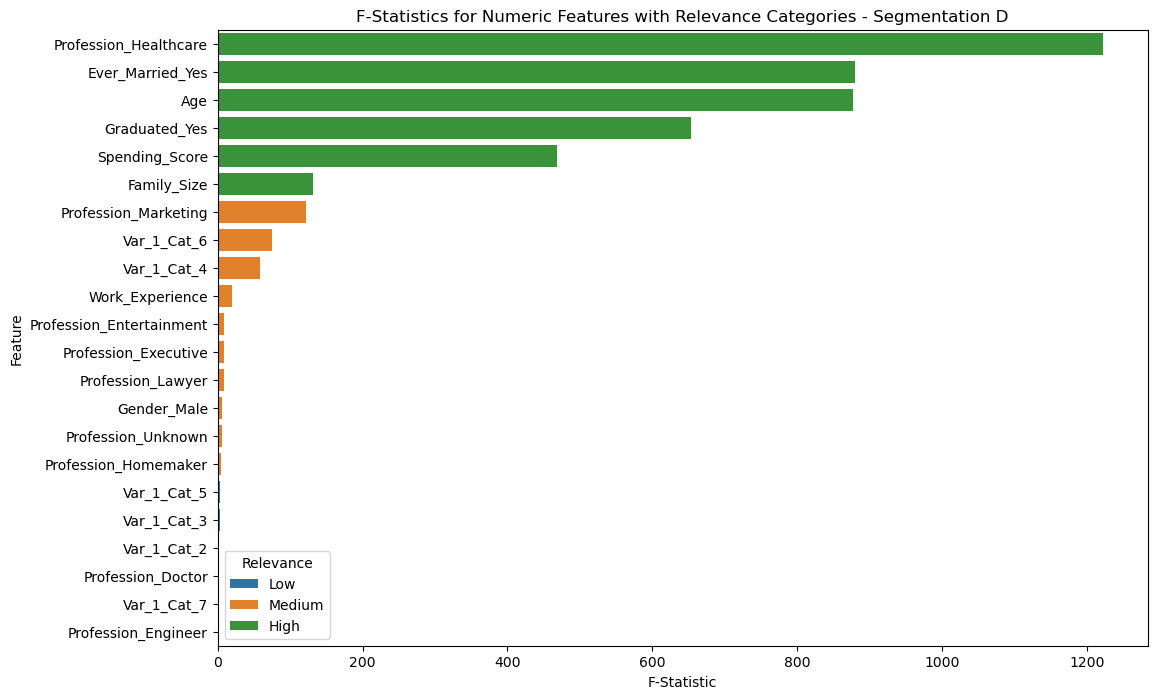

In [77]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.feature_selection import f_classif

# Extract the target column ('Segmentation_D' in this case) and all feature columns
target_column = 'Segmentation_D'
all_feature_columns = [col for col in df.columns if col != target_column and col not in ['Segmentation_A', 'Segmentation_B', 'Segmentation_C']]

# Perform F-statistics test to compute feature importance
f_values, p_values = f_classif(df[all_feature_columns], df[target_column])

# Create a DataFrame to store F-statistics and features
f_stat_df = pd.DataFrame({'Feature': all_feature_columns, 'F-Statistic': f_values, 'p-value': p_values})

# Select significant and non-significant features based on p-values ( p < 0.05)
significant_features = f_stat_df[f_stat_df['p-value'] < 0.05]['Feature']
non_significant_features = f_stat_df[f_stat_df['p-value'] >= 0.05]['Feature']

# Print significant and non-significant features
print("Significant features based on F-statistics:", significant_features.tolist())
print("Non-significant features based on F-statistics:", non_significant_features.tolist())

# Sort the DataFrame by F-Statistic values
f_stat_df = f_stat_df.sort_values(by='F-Statistic', ascending=False)

# Define categorization thresholds
high_threshold = f_stat_df['F-Statistic'].quantile(0.75)
medium_threshold = f_stat_df['F-Statistic'].quantile(0.25)

# Categorize features
f_stat_df['Relevance'] = pd.cut(f_stat_df['F-Statistic'], bins=[-np.inf, medium_threshold, high_threshold, np.inf], labels=['Low', 'Medium', 'High'])

# Plot the F-Statistics with categories
plt.figure(figsize=(12, 8))
sns.barplot(x='F-Statistic', y='Feature', hue='Relevance', data=f_stat_df, dodge=False)
plt.title("F-Statistics for Numeric Features with Relevance Categories - Segmentation D")
plt.savefig('f_statistics_with_relevance_categories_segmentation_d.png')
plt.show()


### Find common non-significant features for all 4 target classes

Names of the features that are not statistically significant (p-value >= 0.05) from the F-test results. These features might be considered for removal or further investigation:
- for predicting **Segmentation_A**: 'Gender_Male', 'Profession_Homemaker', 'Profession_Unknown', 'Ever_Married_Yes', 'Graduated_Yes', 'Var_1_Cat_3', 'Var_1_Cat_5', 'Var_1_Cat_7'
- for predicting **Segmentation_B**: 'Gender_Male', 'Profession_Doctor', 'Profession_Entertainment', 'Profession_Homemaker', 'Profession_Lawyer', 'Var_1_Cat_2', 'Var_1_Cat_3', 'Var_1_Cat_4', 'Var_1_Cat_5', 'Var_1_Cat_6', 'Var_1_Cat_7'
- for predicting **Segmentation_C**: 'Gender_Male', 'Profession_Doctor', 'Profession_Lawyer', 'Profession_Unknown', 'Var_1_Cat_2', 'Var_1_Cat_5', 'Var_1_Cat_7'
- for predicting **Segmentation_D**: 'Profession_Doctor', 'Profession_Engineer', 'Var_1_Cat_2', 'Var_1_Cat_5', 'Var_1_Cat_7'


In [80]:
# Provided lists of non-significant features for each target
non_sig_features_A = ['Gender_Male', 'Profession_Homemaker', 'Profession_Unknown', 'Ever_Married_Yes', 'Graduated_Yes', 'Var_1_Cat_3', 'Var_1_Cat_5', 'Var_1_Cat_7']
non_sig_features_B = ['Gender_Male', 'Profession_Doctor', 'Profession_Entertainment', 'Profession_Homemaker', 'Profession_Lawyer', 'Var_1_Cat_2', 'Var_1_Cat_3', 'Var_1_Cat_4', 'Var_1_Cat_5', 'Var_1_Cat_6', 'Var_1_Cat_7']
non_sig_features_C = ['Gender_Male', 'Profession_Doctor', 'Profession_Lawyer', 'Profession_Unknown', 'Var_1_Cat_2', 'Var_1_Cat_5', 'Var_1_Cat_7']
non_sig_features_D = ['Profession_Doctor', 'Profession_Engineer', 'Var_1_Cat_2', 'Var_1_Cat_5', 'Var_1_Cat_7']

# Find common non-significant features for all four lists
common_features = set(non_sig_features_A).intersection(non_sig_features_B, non_sig_features_C, non_sig_features_D)

print("Common non-significant features for all 4 targets:", list(common_features))


Common non-significant features for all 4 targets: ['Var_1_Cat_5', 'Var_1_Cat_7']


# Drop non-significant features ( which are non-significant for all 4 target classes)

In [82]:
# Non-significant features for all target classes
non_significant_features = ['Var_1_Cat_5', 'Var_1_Cat_7']

# Drop non-significant features from the DataFrame
df.drop(non_significant_features, axis=1, inplace=True)

# Export the updated DataFrame to a new CSV file
df.to_csv('train_split_dimentionality_reducted.csv', index=False)

print("File exported")

File exported
